In [113]:
#imports
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [114]:
ls

Untitled.ipynb         notebook.ipynb         train.csv
gender_submission.csv  test.csv


In [115]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<center> <h1> data description</h1></center>



| Column    | Description                                      | Values                                |
|-----------|--------------------------------------------------|---------------------------------------|
| survival  | Survival                                        | 0 = No, 1 = Yes                      |
| pclass    | Ticket class                                    | 1 = 1st, 2 = 2nd, 3 = 3rd            |
| sex       | Sex                                            | Male / Female                        |
| age       | Age in years                                   | Numeric                              |
| sibsp     | # of siblings/spouses aboard the Titanic       | Numeric                              |
| parch     | # of parents/children aboard the Titanic       | Numeric                              |
| ticket    | Ticket number                                  | Alphanumeric                         |
| fare      | Passenger fare                                 | Numeric                              |
| cabin     | Cabin number                                   | Alphanumeric                         |
| embarked  | Port of Embarkation                            | C = Cherbourg, Q = Queenstown, S = Southampton |


In [116]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

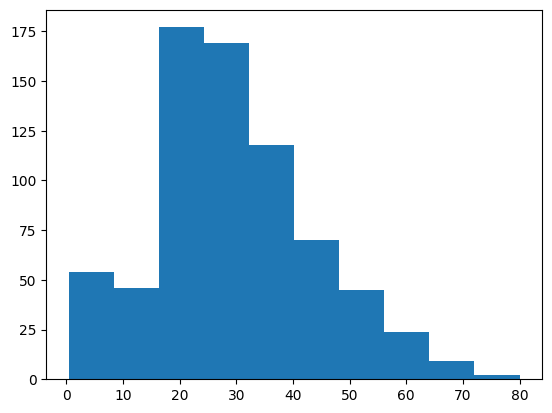

In [118]:
#fill nan's
#lets start with age but fill with mean or median?
plt.hist(train_df.Age)


In [119]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

In [120]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [121]:
Counter(train_df["Embarked"])

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [122]:
train_df["Embarked"].fillna("S", inplace=True)

In [123]:
Counter(train_df["Embarked"])

Counter({'S': 646, 'C': 168, 'Q': 77})

In [124]:
count=[]
sur=[]
for i in train_df[train_df['Cabin'].notna()].index:
        print( train_df.Cabin[i])
        print( train_df.Survived[i])
        count.append(train_df.Cabin[i])
        sur.append(train_df.Cabin[i])
        

C85
1
C123
1
E46
0
G6
1
C103
1
D56
1
A6
1
C23 C25 C27
0
B78
1
D33
1
B30
0
C52
1
B28
1
C83
0
F33
1
F G73
0
C23 C25 C27
1
E31
0
A5
0
D10 D12
1
D26
0
C110
0
B58 B60
0
E101
1
D26
0
F E69
1
D47
1
C123
0
B86
0
F2
0
C2
1
E33
1
B19
0
A7
0
C49
0
F4
1
A32
0
F2
1
B4
1
B80
1
G6
0
A31
1
D36
1
D15
1
C93
1
C83
1
C78
0
D35
1
G6
0
C87
0
B77
1
E67
0
B94
0
C125
1
C99
1
C118
0
D7
1
A19
0
B49
1
D
0
C22 C26
0
C106
1
B58 B60
1
E101
1
C22 C26
1
C65
1
E36
1
C54
1
B57 B59 B63 B66
1
C7
1
E34
1
C32
1
D
1
B18
1
C124
0
C91
0
C2
0
E40
1
T
0
F2
1
C23 C25 C27
1
F33
1
C128
0
E33
1
D37
1
B35
1
E50
1
C82
0
B96 B98
1
D36
1
G6
1
C78
1
E10
1
C52
1
E44
0
B96 B98
1
C23 C25 C27
0
A34
1
C104
1
C111
0
C92
1
E38
0
D21
1
E12
1
E63
0
D
1
A14
0
B49
1
C93
1
B37
0
C30
0
D20
1
C22 C26
0
B79
1
C65
0
E25
1
D46
0
F33
1
B73
1
B18
1
C95
0
B38
0
B39
1
B22
1
C86
0
C70
1
A16
1
E67
1
C101
1
E25
1
E44
1
C68
1
A10
0
E68
1
B41
1
D20
1
A20
1
C125
1
F4
1
D19
1
D50
0
D9
1
A23
1
B50
1
B35
1
D33
1
A26
1
D48
0
E58
0
C126
1
B71
0
B51 B53 B55
1
D49
1
B5
1

In [131]:
sns.barplot(x=count, y=sur, ci=None, order=sorted(count.unique()))



AttributeError: 'list' object has no attribute 'unique'

In [132]:
count.unique()

AttributeError: 'list' object has no attribute 'unique'

In [126]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [139]:
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0})

train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

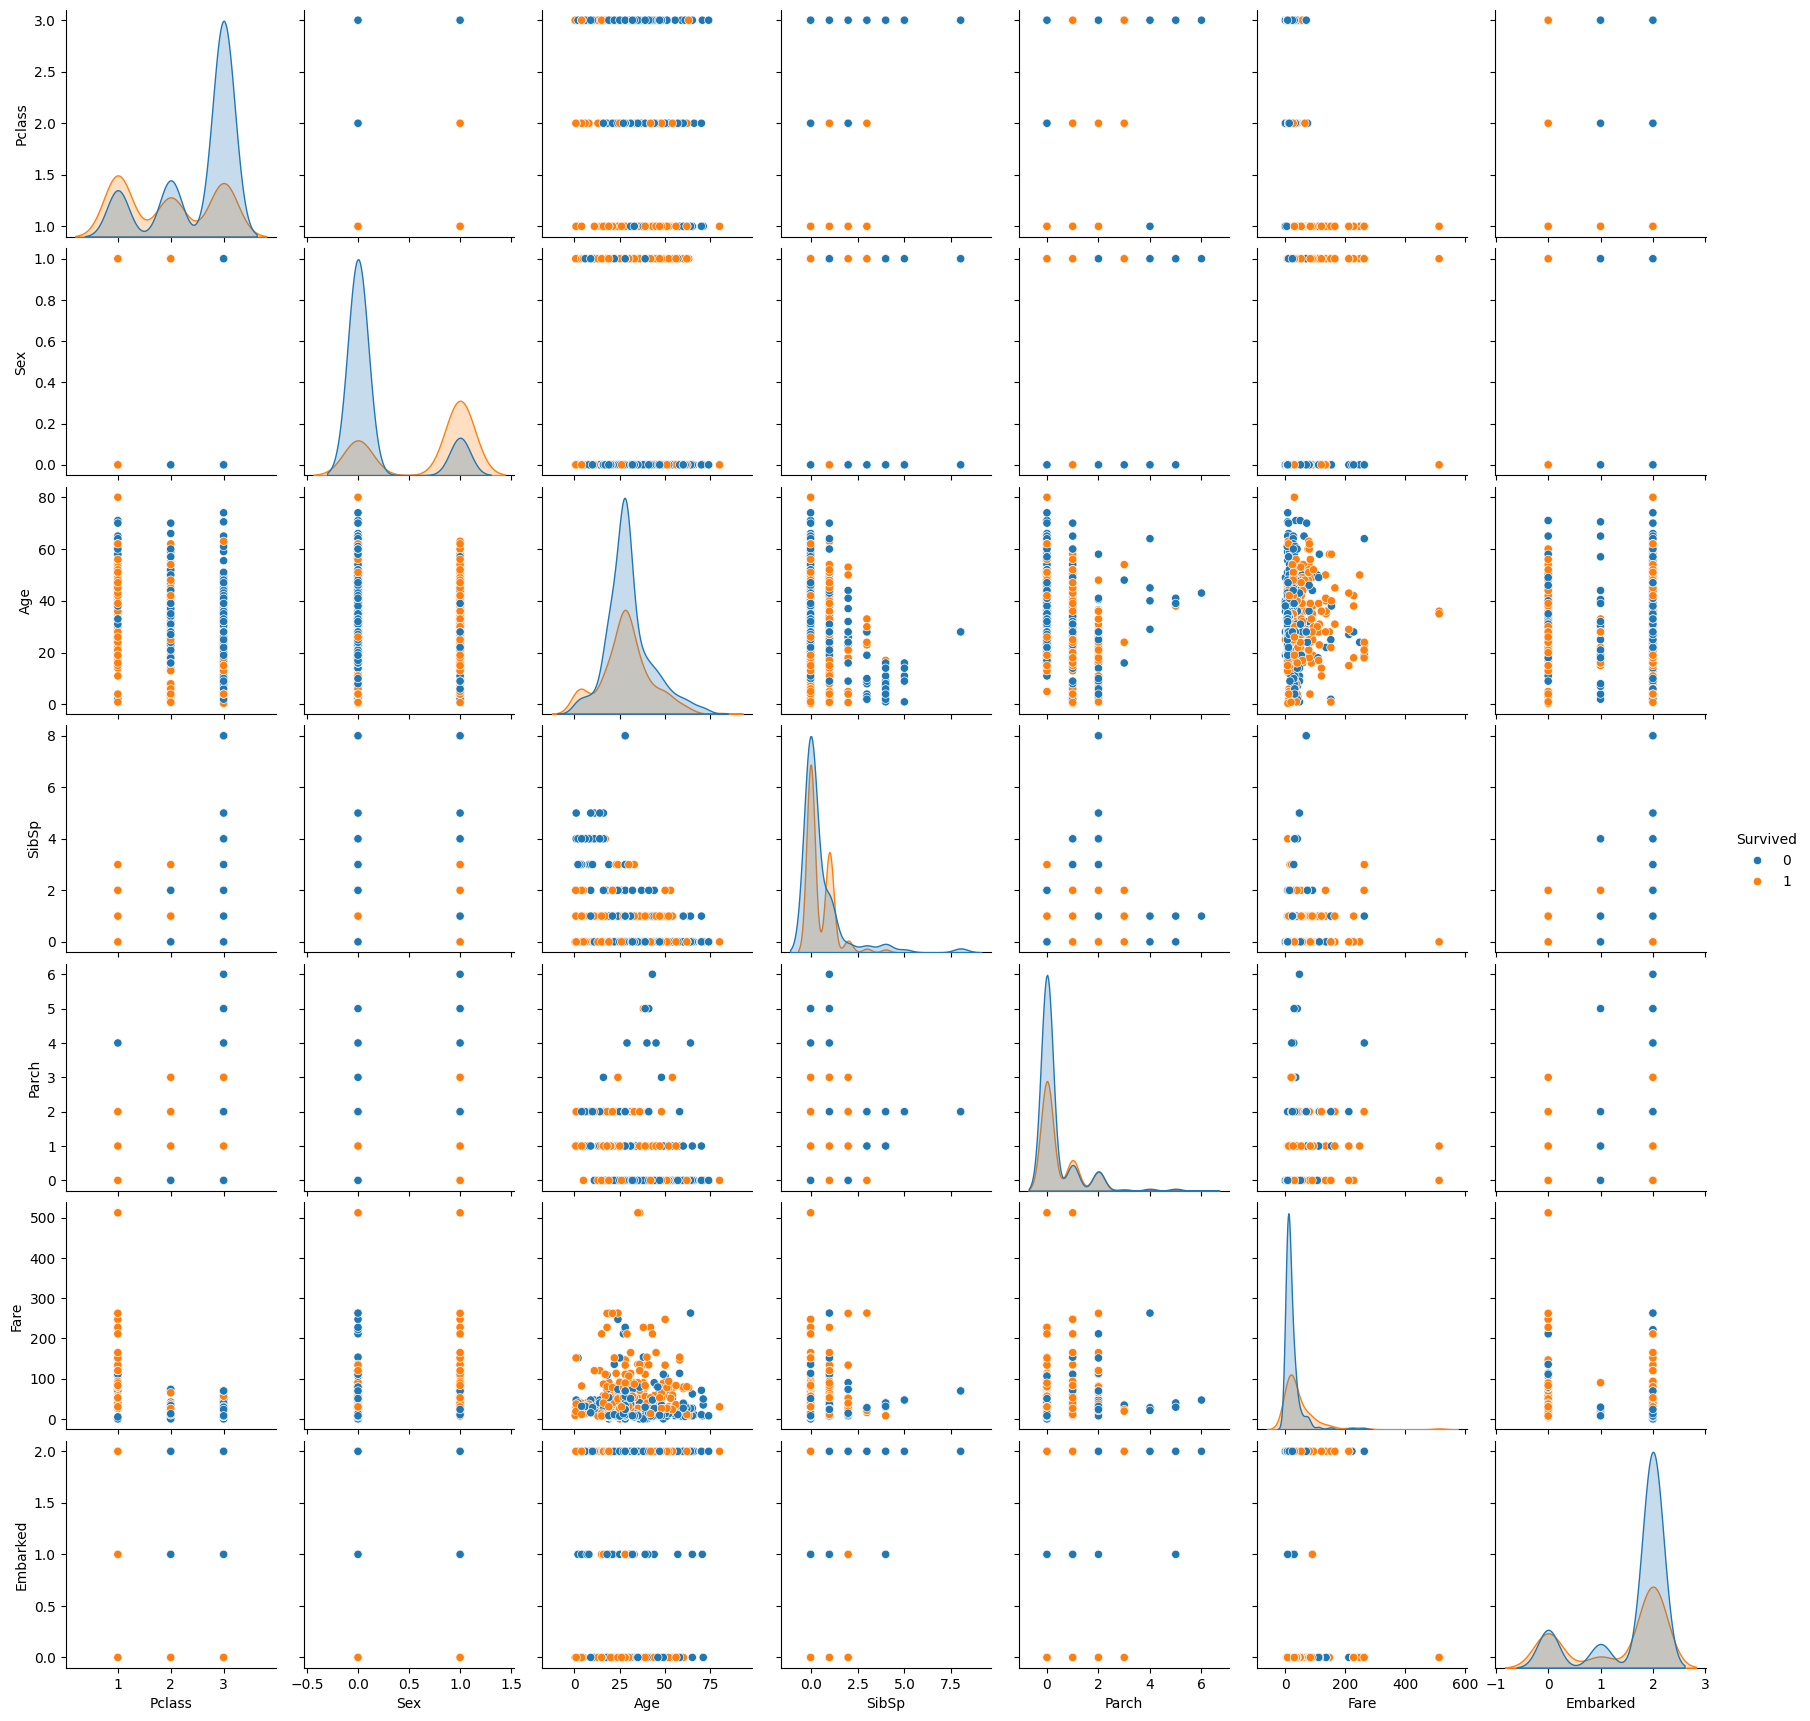

In [141]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Pairplot with Survival as hue
sns.pairplot(train_df[features], hue="Survived", diag_kind="kde")

In [138]:

sns.heatmap(train_df["Age","Sex"].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Survival")
plt.show()

KeyError: ('Age', 'Sex')

In [140]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0
